## Paardenvechters Draft

In [1]:
# Import packages
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go


link to dataset3: https://www.kaggle.com/datasets/henryshan/sleep-health-and-lifestyle
# Introductie

Diabetes is een chronische ziekte die impact heeft op miljoenen mensen. Hierbij kan het lichaam glucose niet goed reguleren wat kan leiden tot een te hoge bloedsuikerspiegel en schade aan verschillende organen als het niet wordt behandeld.

Diabetes kan in twee vormen voorkomen: diabetes type 1 en type 2 In deze data story wordt er voornamelijk gesproken over type 2, omdat er verschillende correlaties gevonden kunnen worden tussen verschillende factoren zoald voeding, sporten en klimaat die van invloed zijn bij het ontstaan van deze ziekte integenstelling tot diabetes type 1 dat alleen kan onstaan op basis van je genetische aanleg. Door te begrijpen hoe fysieke activiteit en omgevingsfactoren bijdragen aan deze aandoening, kunnen we effectievere preventie- en behandelstrategieën ontwikkelen en de levenskwaliteit van mensen die diabetes hebben verbeteren.

studenten: Pepe Morselt (15239551), Marilène Oud (15247112), Paul Elsinghorst (15002608), Thimo de Wolff (15240428)

Onze perspectieven en argumenten zijn de volgende:

Verschillende levensstijl factoren kunnen een impact hebben op het risico en het ontstaan van diabetes.

Arg 1: Regelmatige lichaamsbeweging, zoals aerobe oefeningen en krachttraining, verbetert niet alleen de insulinegevoeligheid maar speelt ook een cruciale rol in gewichtsbeheersing. Een gebalanceerd dieet is daarnaast ook essentieel voor gewichtsbeheersing en diabetespreventie

Arg 2: Naast roken hebben andere levensstijlkeuzes zoals stressmanagement en slaappatronen ook invloed op het risico op diabetes. Overmatige consumptie van alcohol kan ook leiden tot insulineresistentie.

Zwangerschap kan ook een belangrijke invloed hebben op de ontwikkeling van diabetes.

Arg 1: Zwangerschapsdiabetes ontstaat wanneer de hormonen van de zwangerschap de insulinewerking van het lichaam verstoren, wat leidt tot een verhoogde bloedsuikerspiegel. Dit type diabetes verdwijnt meestal na de bevalling, maar het kan zowel voor de moeder als het kind complicaties veroorzaken, zoals een verhoogd risico op type 2 diabetes later in het leven.

Door een gezond dieet met veel suikervrije voedingsmiddelen kan diabetes type 2 genezen worden.

Arg 1: Een gezond dieet dat rijk is aan vezels, volle granen, magere eiwitten en groenten kan bijdragen aan gewichtsverlies of gewichtsbeheersing.

Arg 2: Suikervrije voedingsmiddelen, vooral diegene met een lage glycemische index (GI), kunnen helpen om stabiele bloedsuikerspiegels te handhaven.

In [15]:
df = pd.read_csv("diabetes.csv")
pd.set_option('display.max_columns', None)
df = df.rename(columns={'Outcome': 'diabetes'})

In [3]:
df2 = pd.read_csv("diabetes_prediction_dataset.csv")
pd.set_option('display.max_columns', None)

In [14]:
df3 = pd.read_csv("ss.csv")
df3['BMI Category'] = df3['BMI Category'].replace('Normal Weight', 'Normal')

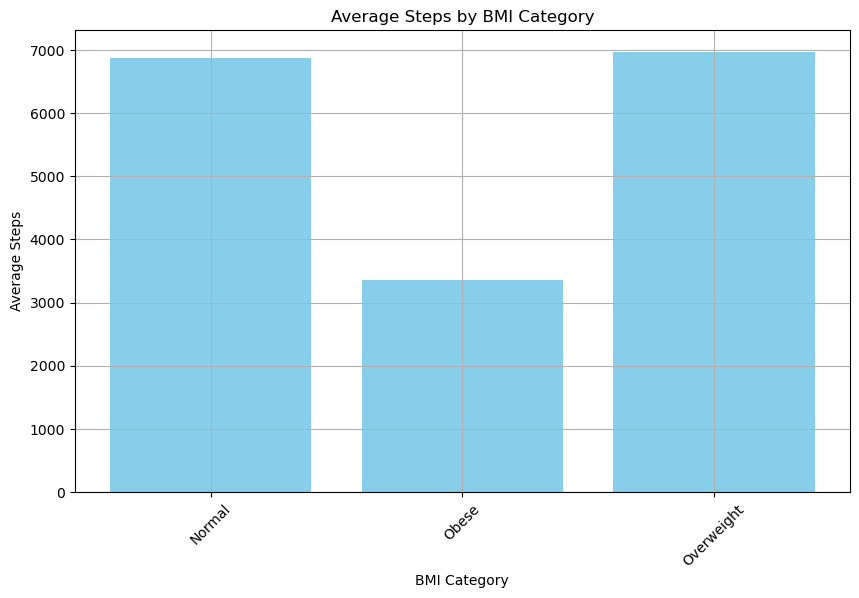

In [5]:
steps_by_bmi = df3.groupby('BMI Category')['Daily Steps'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(steps_by_bmi['BMI Category'], steps_by_bmi['Daily Steps'], color='skyblue')
plt.xlabel('BMI Category')
plt.ylabel('Average Steps')
plt.title('Average Steps by BMI Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

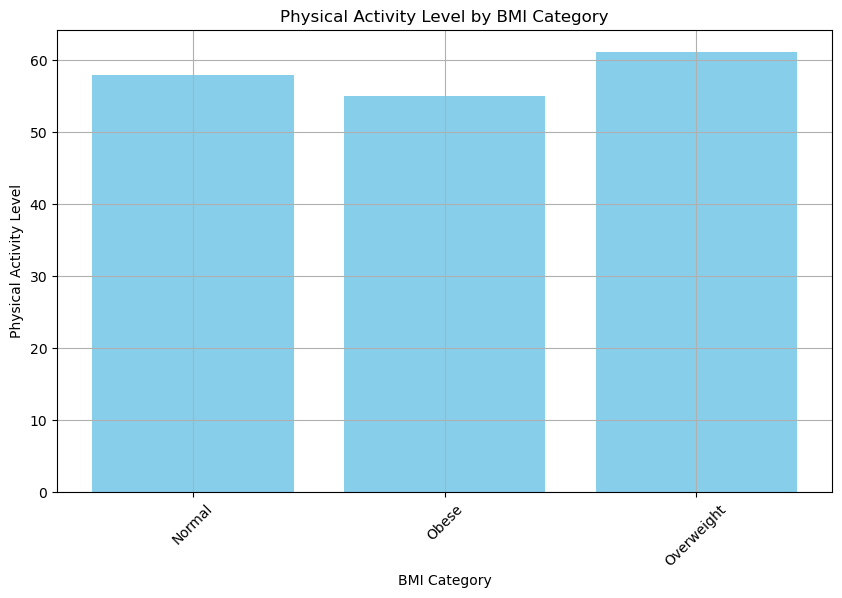

In [6]:
steps_by_bmi = df3.groupby('BMI Category')['Physical Activity Level'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(steps_by_bmi['BMI Category'], steps_by_bmi['Physical Activity Level'], color='skyblue')
plt.xlabel('BMI Category')
plt.ylabel('Physical Activity Level')
plt.title('Physical Activity Level by BMI Category')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [7]:
def convert_bp_to_average(bp):
    systolic, diastolic = map(int, bp.split('/'))
    return (systolic + diastolic) / 2

# Apply the function to the 'Blood Pressure' column
df3['Average Blood Pressure'] = df3['Blood Pressure'].apply(convert_bp_to_average)
df3

Person ID  Gender  Age            Occupation  Sleep Duration  \
0            1    Male   27     Software Engineer             6.1   
1            2    Male   28                Doctor             6.2   
2            3    Male   28                Doctor             6.2   
3            4    Male   28  Sales Representative             5.9   
4            5    Male   28  Sales Representative             5.9   
..         ...     ...  ...                   ...             ...   
368        369  Female   59                 Nurse             8.1   
369        370  Female   59                 Nurse             8.1   
370        371  Female   59                 Nurse             8.0   
371        372  Female   59                 Nurse             8.1   
372        373  Female   59                 Nurse             8.1   

     Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                   6                       42             6   Overweight   
1                   6                       60             8       Normal   
2                   6                       60             8       Normal   
3                   4                       30             8        Obese   
4                   4                       30             8        Obese   
..                ...                      ...           ...          ...   
368                 9                       75             3   Overweight   
369                 9                       75             3   Overweight   
370                 9                       75             3   Overweight   
371                 9                       75             3   Overweight   
372                 9                       75             3   Overweight   

    Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  \
0           126/83          77         4200            NaN   
1           125/80          75        10000            NaN   
2           125/80          75        10000            NaN   
3           140/90          85         3000    Sleep Apnea   
4           140/90          85         3000    Sleep Apnea   
..             ...         ...          ...            ...   
368         140/95          68         7000    Sleep Apnea   
369         140/95          68         7000    Sleep Apnea   
370         140/95          68         7000    Sleep Apnea   
371         140/95          68         7000    Sleep Apnea   
372         140/95          68         7000    Sleep Apnea   

     Average Blood Pressure  
0                     104.5  
1                     102.5  
2                     102.5  
3                     115.0  
4                     115.0  
..                      ...  
368                   117.5  
369                   117.5  
370                   117.5  
371                   117.5  
372                   117.5  

[373 rows x 14 columns]

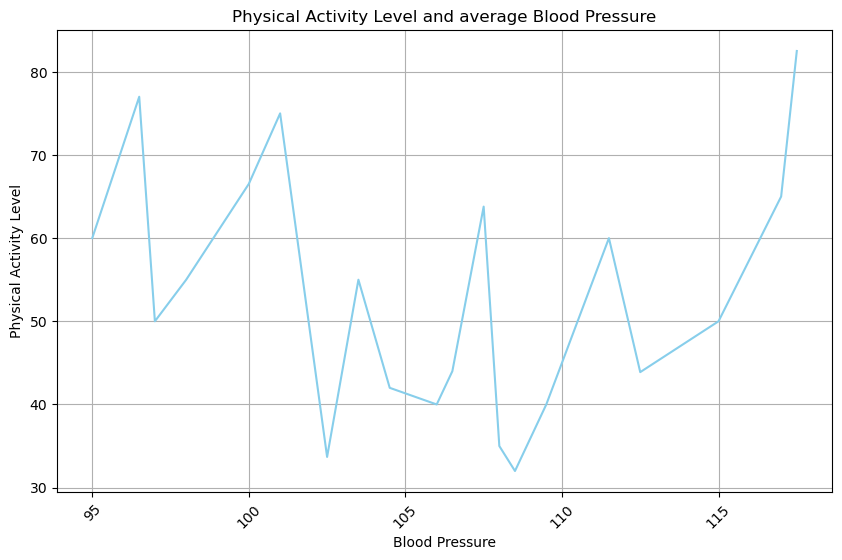

In [8]:
steps_by_bmi = df3.groupby('Average Blood Pressure')['Physical Activity Level'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.plot(steps_by_bmi['Average Blood Pressure'], steps_by_bmi['Physical Activity Level'], color='skyblue')
plt.xlabel('Blood Pressure')
plt.ylabel('Physical Activity Level')
plt.title('Physical Activity Level and average Blood Pressure')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

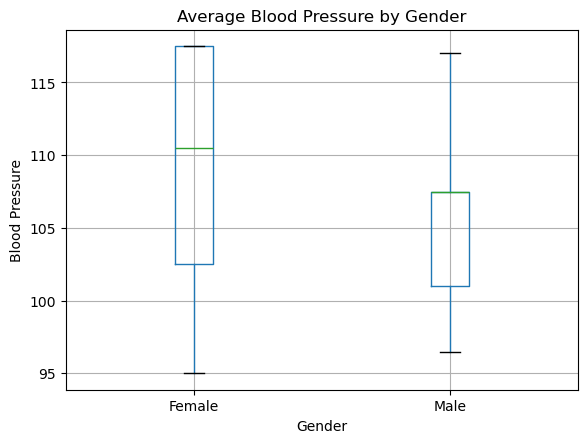

In [13]:
# Create box plot
plt.figure(figsize=(10, 6))
df3.boxplot(column='Average Blood Pressure', by='Gender')
plt.title('Average Blood Pressure by Gender')
plt.suptitle('')
plt.xlabel('Gender')
plt.ylabel('Blood Pressure')
plt.show()

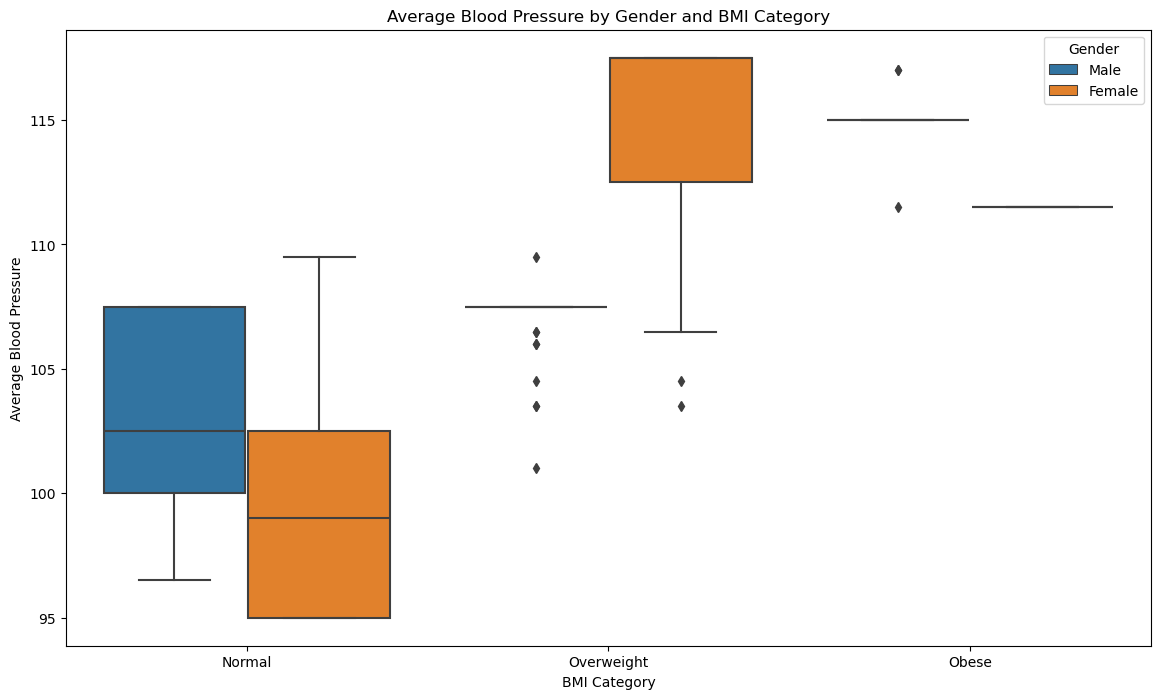

In [10]:
bmi_order = ['Normal', 'Overweight', 'Obese']

plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='BMI Category', y='Average Blood Pressure', hue='Gender', data=df3, order=bmi_order)
ax.set_title('Average Blood Pressure by Gender and BMI Category')
ax.set_xlabel('BMI Category')
ax.set_ylabel('Average Blood Pressure')
plt.legend(title='Gender', loc='upper right')
plt.show()

# Observations

There is quite a strong correlation betweeen obesity and blood pressure. The mean blood pressure clearly rises with every BMI Category. It is however a bit unclear what the boxplot looks like in the overwight and obese categories. It seems that females usually have a lower blood pressure than men.

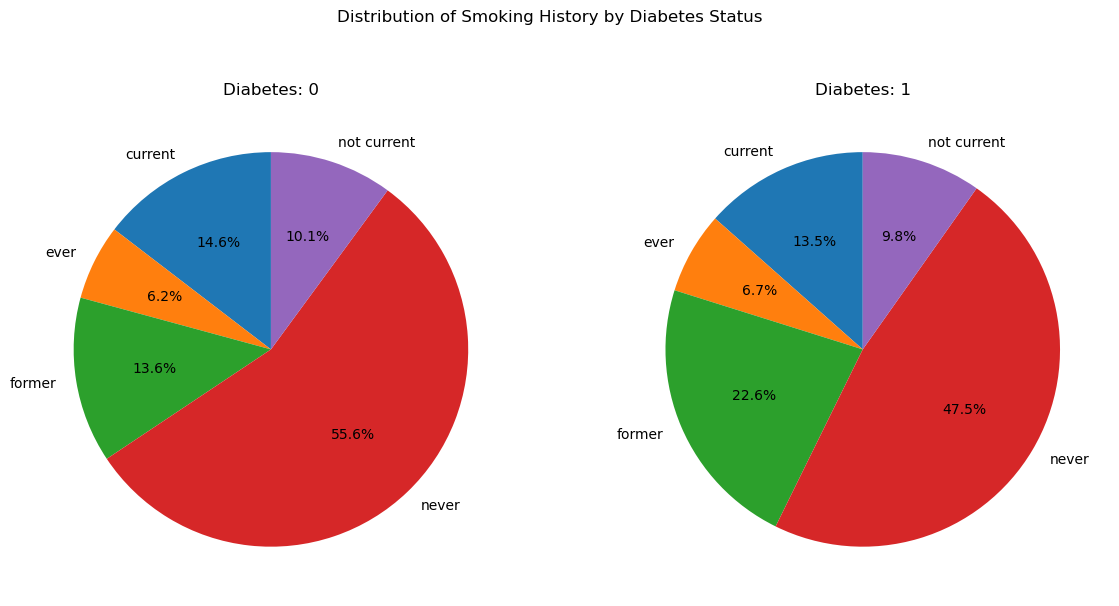

In [11]:
df2 = df2[df2['smoking_history'] != 'No Info']
diabetes_smoking_summary = df2.groupby(['diabetes', 'smoking_history']).size().unstack()

fig, axes = plt.subplots(1, 2, figsize=(14, 7))

for i, diabetes_category in enumerate(diabetes_smoking_summary.index):
    axes[i].pie(diabetes_smoking_summary.loc[diabetes_category],
                labels=diabetes_smoking_summary.columns,
                autopct='%1.1f%%',
                startangle=90)
    axes[i].set_title(f'Diabetes: {diabetes_category}')

plt.suptitle('Distribution of Smoking History by Diabetes Status')
plt.show()

# Observations

This data was filtered so the unknown were not put in the pie chart, which may lead to misrepresentation. 

The people with diabetes are more likely to have been smokers. However we haven't discovered why this is the case.

## Glucose Waarden

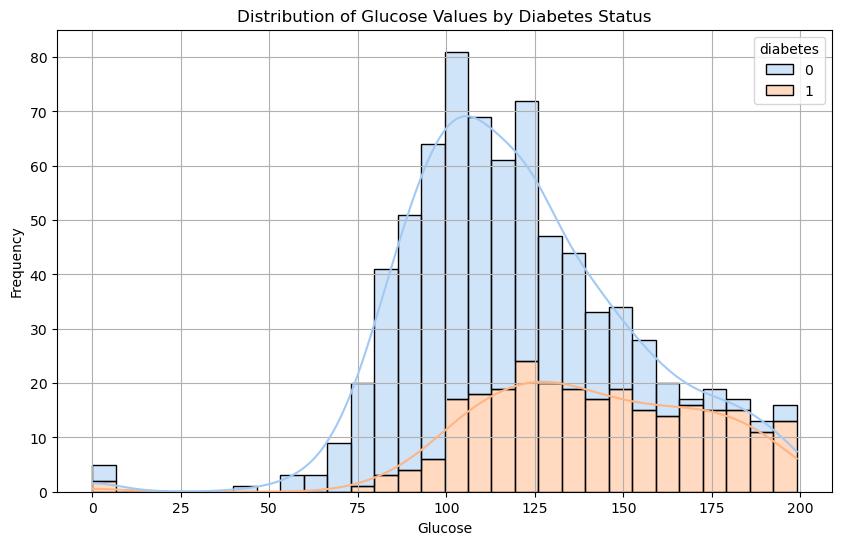

In [12]:
import warnings

warnings.filterwarnings('ignore')

df.replace([np.inf, -np.inf], np.nan, inplace=True)

df.dropna(subset=['Glucose', 'diabetes'], inplace=True)

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Glucose', hue='diabetes', bins=30, kde=True, palette='pastel', multiple='stack')
plt.title('Distribution of Glucose Values by Diabetes Status')
plt.xlabel('Glucose')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Obervations

It is clear that the higher the glucose level the higher the percentage of those people have diabetes. Which is to be expected since they have a strong correlation.

In [17]:
import plotly.express as px
import pandas as pd

diab_prev = pd.read_csv('diabetes-prevalence.csv')

diab_prev['Year'] = pd.to_numeric(diab_prev['Year'])

diab_prev_sorted = diab_prev.sort_values(by='Year')

fig = px.choropleth(diab_prev_sorted, 
                    locations='Code',
                    color='Diabetes prevalence (% of population ages 20 to 79)',  # Column with data to plot
                    hover_name='Entity',
                    animation_frame='Year',
                    color_continuous_scale='YlOrRd',
                    projection='natural earth'
                   )

fig.update_layout(title='Diabetes Prevalence Worldwide',
                  geo=dict(showcoastlines=True,
                           showcountries=True),
                  height=600,
                  width=1000
                 )

fig.show()